## Familiarization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Not allowed to use seaborn
import seaborn as sns

df = pd.read_csv("lab1_train.csv")
df = df.dropna()
print(df.shape)

(496800, 53)


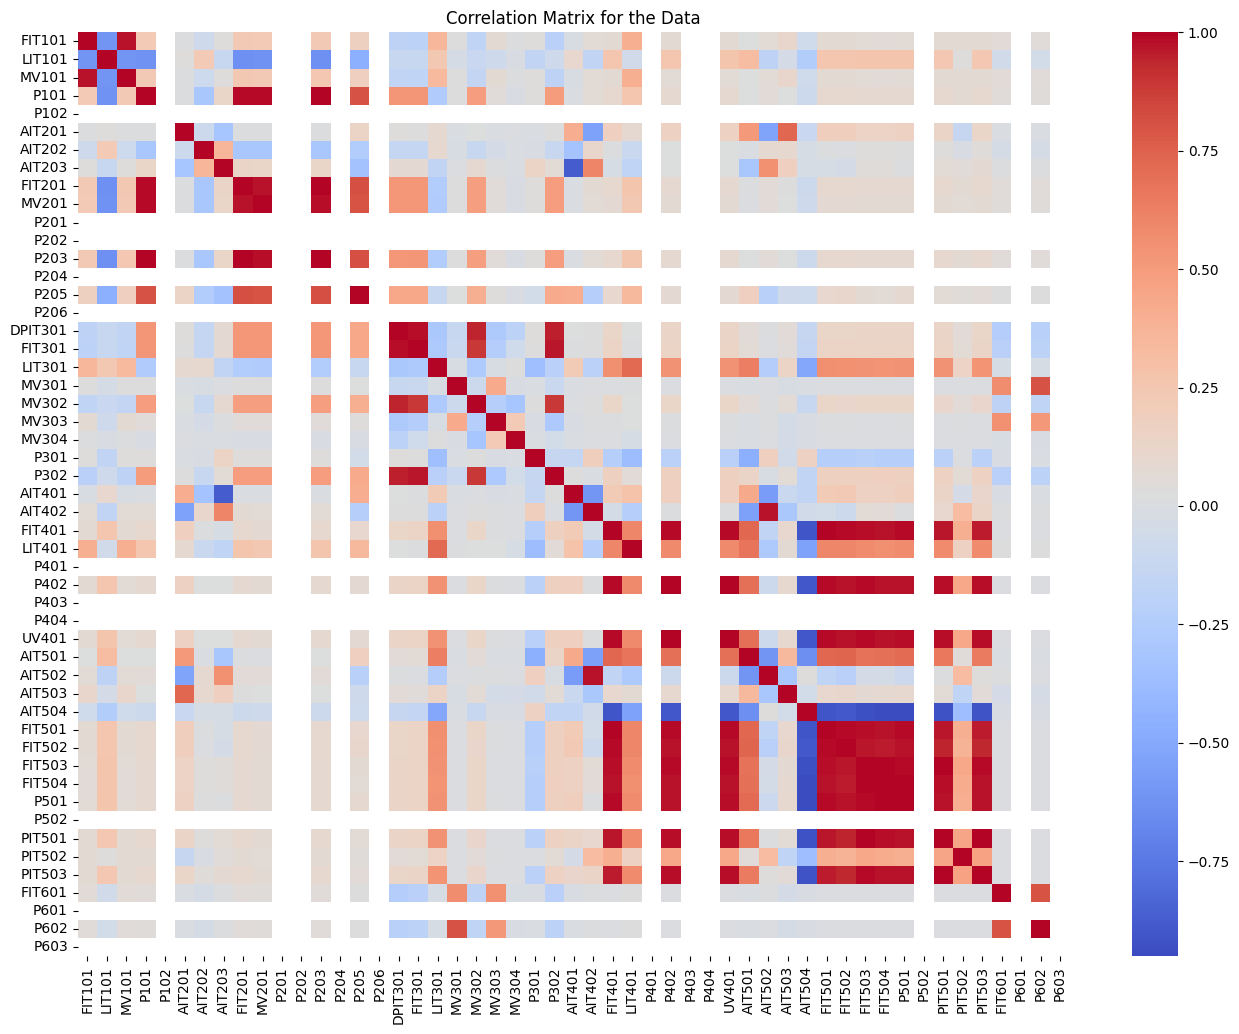

In [11]:
# print(df.head)
df_numeric = df.drop(columns=["Timestamp", "Normal/Attack"])
corr_m= df_numeric.corr()
plt.figure(figsize=(16, 12))

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn-heatmap
sns.heatmap(corr_m, annot=False, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for the Data")
plt.show()

C:\Users\satya\AppData\Local\Temp\ipykernel_488\1090472459.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


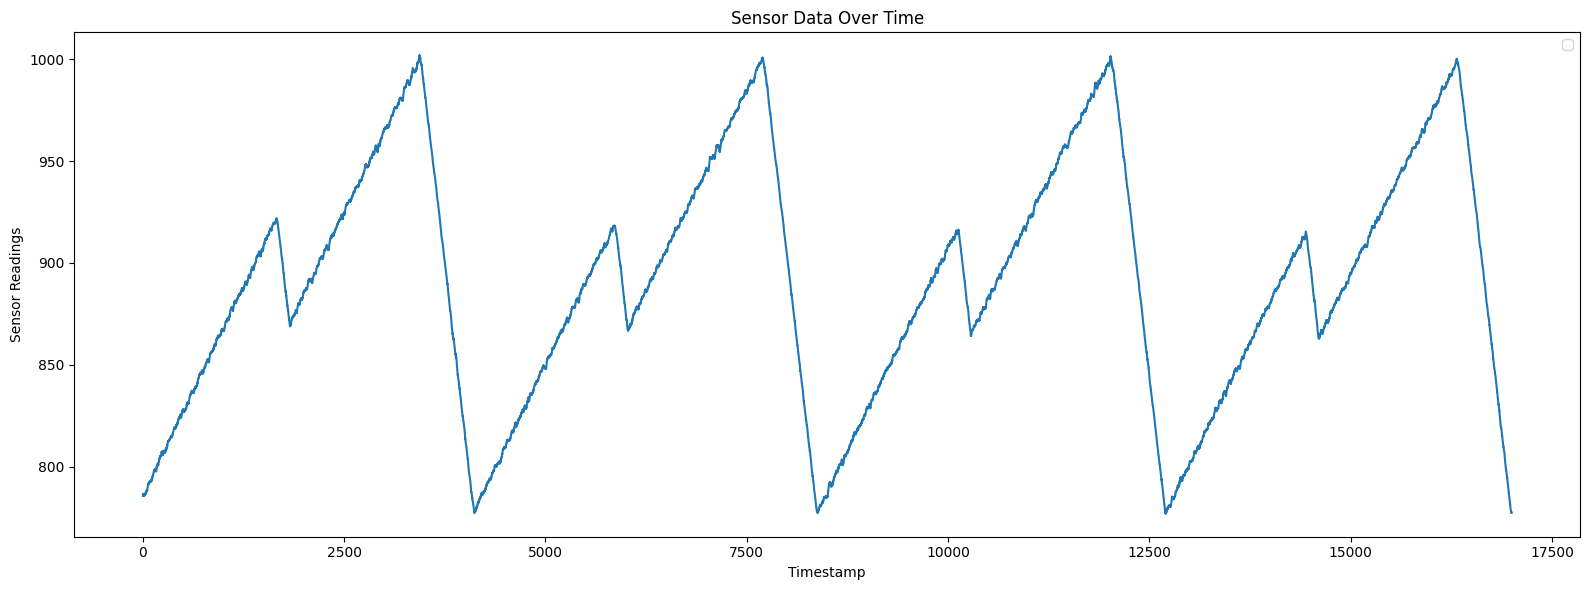

In [62]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
df_npg = np.array(df["LIT401"])[247400:264400]
plt.figure(figsize=(16, 6))
plt.plot(df_npg)
plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.title('Sensor Data Over Time')
plt.legend()

plt.tight_layout()
plt.show()

## DTW Anomaly Detection

C:\Users\satya\AppData\Local\Temp\ipykernel_10972\1803678526.py:17: UserWarning: Parsing dates in %d/%m/%Y %I:%M:%S %p format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


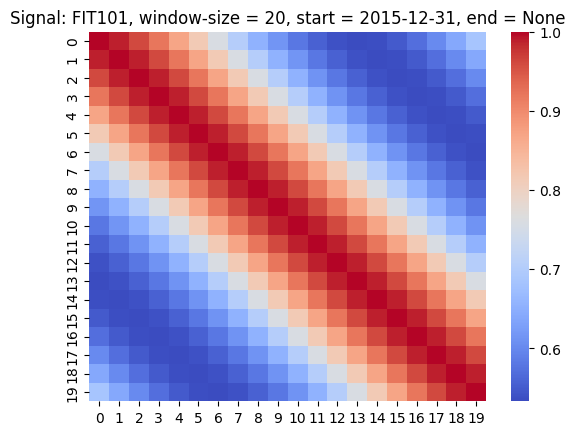

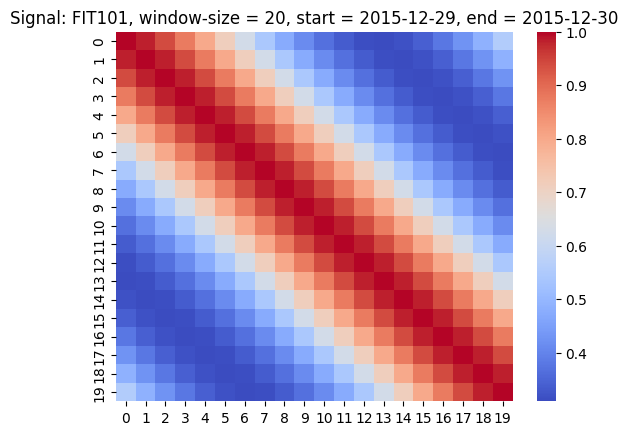

In [8]:
def signal_heatmap(signal= "LIT401", window_shape = 20, start_index = 200000, end_index = -1):
    # Now we select a column (e.g., LIT101), generate sliding windows of size 20, and compute the correlation matrix between the windows.
    sig = df[signal].tolist()
    windows_data = []

    if (end_index == -1): 
        end_index = len(sig)

    windows_data = np.lib.stride_tricks.sliding_window_view(sig[start_index:end_index], window_shape=window_shape)

    windows_df = pd.DataFrame(windows_data)
    windows_correlation_df = windows_df.corr(method="spearman")
    sns.heatmap(windows_correlation_df, annot=False, cmap='coolwarm')
    plt.show()
    
def signal_heatmap_by_timestamp(df, signal="LIT401", window_shape=20, start_timestamp=None, end_timestamp=None):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    if start_timestamp is not None:
        df = df[df['Timestamp'] >= pd.to_datetime(start_timestamp)]
    
    if end_timestamp is not None:
        df = df[df['Timestamp'] <= pd.to_datetime(end_timestamp)]
    
    sig = df[signal].tolist()
    
    windows_data = []
    if len(sig) > window_shape: 
        windows_data = np.lib.stride_tricks.sliding_window_view(sig, window_shape=window_shape)
    

    windows_df = pd.DataFrame(windows_data)
    
    windows_correlation_df = windows_df.corr(method="spearman")
    sns.heatmap(windows_correlation_df, annot=False, cmap='coolwarm')
    plt.title(f'Signal: {signal}, window-size = {window_shape}, start = {start_timestamp}, end = {end_timestamp}')

    plt.show()
    
# signal_heatmap(signal="FIT101")
signal_heatmap_by_timestamp(df, signal="FIT101", window_shape=20, start_timestamp='2015-12-31', end_timestamp=None)
signal_heatmap_by_timestamp(df, signal="FIT101", window_shape=20, start_timestamp='2015-12-29', end_timestamp='2015-12-30')
# signal_heatmap_by_timestamp(df, signal="FIT101", window_shape=100, start_timestamp=None, end_timestamp=None)

